# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/Module%2012-%20Clustering/python/Kmode_kprototypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

## Installation 
First, you need to install the kmodes package. You can do this by running the following command in your terminal: !pip install kmodes.

note: if you have PyCaret installed, the kmodes package is already there.

# Kmode

1. Initialization: K-Modes starts by initializing k centroids. The centroids in K-Modes are actual data points from the dataset, rather than the mean of the points in a cluster, as in K-Means. The initialization can be random, or it can be done by various smarter methods, such as the Huang or Cao methods, to improve the clustering process's convergence and quality.

2. Assignment Step: Each data point is assigned to the nearest centroid. The distance here is not Euclidean, as with K-Means, but instead, it is typically based on the Hamming distance, which is the number of matching categories between two data points. A data point is assigned to the cluster of the centroid it has the least number of category mismatches with.

3. Update Step: After all points have been assigned to clusters, the centroids are recalculated. In K-Modes, the centroids are updated to be the mode of the clusters - the most frequent category level for each categorical attribute within the cluster. This is different from K-Means, where the centroid is the mean value of the points in the cluster.

4. Iteration: The assignment and update steps are repeated iteratively until the centroids stabilize and no more changes occur in the clusters (or until some other stopping criterion is met, such as a maximum number of iterations).

5. Cost Function: The cost function in K-Modes is based on the dissimilarities within clusters, often using a simple matching dissimilarity measure. The goal is to minimize the total dissimilarity within all clusters.

6. Handling of Different Categories: K-Modes can handle different numbers of categories across attributes by considering the frequency of each category within a cluster when updating the centroids.

K-Modes is particularly powerful for categorical data because it does not rely on mean or median, which are not defined for categorical variables. The mode is a suitable central tendency measure for categorical data, and the use of a matching dissimilarity measure makes the algorithm appropriate for non-numeric data types. It is also computationally efficient, which makes it a good choice for large datasets.

In [36]:
from kmodes.kmodes import KModes
import pandas as pd

# Example dataset with categorical features
data = {
    'Investment Type': ['Stocks', 'Bonds', 'Mutual Funds', 'ETFs', 'Stocks', 'Bonds'],
    'Risk Tolerance': ['High', 'Low', 'Medium', 'High', 'Medium', 'Low'],
    'Investment Duration': ['Long-term', 'Short-term', 'Medium-term', 'Long-term', 'Short-term', 'Medium-term']
}
df = pd.DataFrame(data)

# Initialize the K-Modes model
km = KModes(n_clusters=2, init='Huang', n_init=5, random_state=100, verbose=2)

# Fit the model on the dataset
clusters = km.fit_predict(df)

# Show the cluster centroids (mode of each cluster)
centroids = km.cluster_centroids_

# Create a DataFrame for the centroids
centroids_df = pd.DataFrame(centroids, columns=df.columns)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 6.0
Best run was number 4


In [37]:
centroids_df

,Investment Type,Risk Tolerance,Investment Duration
0,Bonds,Low,Medium-term
1,Stocks,High,Long-term


In [38]:
data_df = pd.DataFrame(data)
data_df['cluster']=clusters
data_df

,Investment Type,Risk Tolerance,Investment Duration,cluster
0,Stocks,High,Long-term,1
1,Bonds,Low,Short-term,0
2,Mutual Funds,Medium,Medium-term,0
3,ETFs,High,Long-term,1
4,Stocks,Medium,Short-term,1
5,Bonds,Low,Medium-term,0


Can you show how cost=6 is calculated? try cluster=6?

# Kprototypes

K-Prototypes clustering is an extension of the K-Means algorithm that is specifically designed to handle datasets with mixed numeric and categorical features. It combines the features of K-Means and K-Modes, making it well-suited for clustering datasets with continuous and categorical features




In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Mall_Customers.csv')

In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.drop('CustomerID', axis=1, inplace=True)

In [43]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


* **Beyond K-Means algorithm**: 
    * K-mode github: https://github.com/nicodv/kmodes/tree/master
    * K-prototype clustering: https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb

In [44]:
from kmodes.kprototypes import KPrototypes

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [46]:
# Convert categorical columns to category data type
df['Gender'] = df['Gender'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    category
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 5.1 KB


In [47]:
# Initialize the KPrototypes model
kproto = KPrototypes(n_clusters=6 , random_state=100)

In the context of clustering, particularly with the K-Prototypes and K-Modes algorithms, the Huang and Cao initialization methods are techniques used to set the initial positions of the centroids. Here's a brief explanation of each:

The **Huang** method initializes centroids based on the frequencies of the categorical attributes. The first centroid is randomly selected from the data points. For the subsequent centroids, the method chooses data points that differ from the already chosen centroids by at least a specified threshold in terms of their attribute frequencies.
The idea is to select diverse centroids that represent different patterns in the categorical data.
This method can be particularly useful when the categorical features have many possible categories, and you want to ensure a diverse starting point for the algorithm.
Cao Initialization:

The **Cao** method is more sophisticated and aims to select initial centroids that are well separated from each other. It does so by considering the overall distribution of the data.
It calculates a density measure for each point that takes into account both the number of points that are close to it (in terms of a defined distance) and the categorical attributes.
Points with higher density measures are more likely to be selected as initial centroids. This method tries to find centroids that are representative of the data's density structure.
Both methods are designed to improve the convergence of the K-Modes and K-Prototypes algorithms by providing a good starting point that reflects the underlying distribution of the data. The Cao method tends to be more robust and can lead to better clustering results because it considers the data distribution more carefully, while Huang is often faster but may require more iterations to converge.

When dealing with a dataset that has a mix of numerical and categorical features, as with K-Prototypes, the choice between Huang and Cao initialization methods could influence the quality of the final clustering. The Cao method is generally preferred for its robustness, but the best choice might depend on the specific characteristics of the data and sometimes empirical testing is required to determine which method performs better in a given scenario.

In [48]:
# Fit the model
clusters = kproto.fit_predict(df , categorical=[0])  # Index 0 is 'Gender'
clusters

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 1, 4,
       2, 3, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 5, 4, 5, 0, 5, 0, 5, 0, 5,
       4, 5, 0, 5, 0, 5, 0, 5, 0, 5, 4, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5], dtype=uint16)

In [49]:
kproto.get_params()

{'cat_dissim': <function kmodes.util.dissim.matching_dissim(a, b, **_)>,
 'gamma': 10.98198334886498,
 'init': 'Cao',
 'max_iter': 100,
 'n_clusters': 6,
 'n_init': 10,
 'n_jobs': 1,
 'num_dissim': <function kmodes.util.dissim.euclidean_dissim(a, b, **_)>,
 'random_state': 100,
 'verbose': 0}

# Kprototype cost 

kproto.cost_  is computed as the sum of dissimilarities between each point in the dataset and the centroid of the cluster it belongs to.

The dissimilarity measure used in K-Prototypes combines the cost of numerical features, typically calculated using a distance metric like the Euclidean distance, with the cost of categorical features, which is calculated using a matching dissimilarity measure (for example, the simple matching dissimilarity where the cost increases when the categories do not match).

Here's what the cost represents:

* For numerical attributes: The cost is the sum of squared distances between the data points and the centroid of their respective clusters.
* For categorical attributes: The cost is typically the number of mismatches between the data points and the modes of the categorical attributes in their respective clusters.

In [50]:
kproto.cost_

59211.94793954648

In [51]:
# Output the cluster centroids
print(kproto.cluster_centroids_)


[['41.68571428571428' '88.22857142857143' '17.285714285714285' 'Male']
 ['56.15555555555556' '53.37777777777778' '49.08888888888889' 'Female']
 ['44.142857142857146' '25.142857142857142' '19.523809523809526' 'Female']
 ['25.272727272727273' '25.727272727272727' '79.36363636363636' 'Female']
 ['27.0' '56.6578947368421' '49.13157894736842' 'Female']
 ['32.69230769230769' '86.53846153846153' '82.12820512820512' 'Female']]


In [52]:
# Attach the cluster labels to your original dataframe
df['Cluster'] = clusters
print(df)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0      Male   19                  15                      39        2
1      Male   21                  15                      81        3
2    Female   20                  16                       6        2
3    Female   23                  16                      77        3
4    Female   31                  17                      40        2
..      ...  ...                 ...                     ...      ...
195  Female   35                 120                      79        5
196  Female   45                 126                      28        0
197    Male   32                 126                      74        5
198    Male   32                 137                      18        0
199    Male   30                 137                      83        5

[200 rows x 5 columns]


# optimal K (elbow method)

In [53]:
# let's use the elbow method to find the optimal number of clusters
cost = []
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters, random_state=100)
    kproto.fit_predict(df, categorical=[0])
    cost.append(kproto.cost_)

optimal_k = pd.DataFrame({'num_clusters': list(range(1,10)), 'cost': cost})  
optimal_k  

,num_clusters,cost
0,1,310217.573393
1,2,213835.300810
2,3,144303.869019
3,4,105306.288403
4,5,76305.550432
5,6,59002.918909
6,7,51785.018555
7,8,45936.397118
8,9,41481.976961


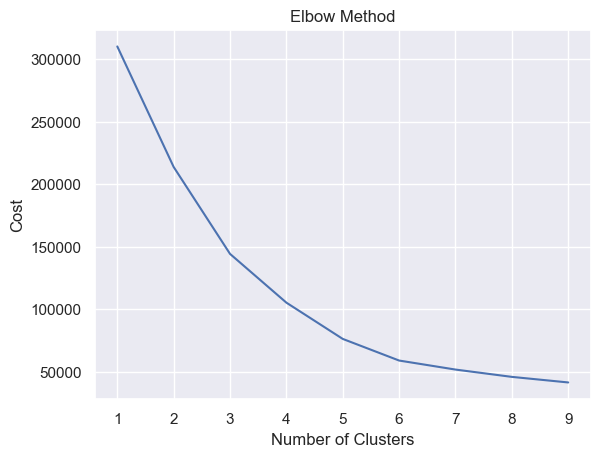

In [54]:
# Plot the elbow curve
plt.plot(optimal_k['num_clusters'], optimal_k['cost'])
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method')
plt.show()

# Done!